## Info 113 Introduction to Data Science
## Homework 3: from VI-ME-BA-BAR to POM
# PART 1: Prepare Data
We repeat the VI-ME-BA-BAR pipeline from Homework 2, but this time on a larger dataset, which is noisier. First we check everything is OK on 10 examples of each class. Then we proprocess the entire dataset. NO QUESTION FOR THE PREPROCESSING PART.

In [41]:
# Load general libraries
import os, re
from glob import glob as ls
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns; sns.set()
from PIL import Image
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Step 1: {VI}sualization and data preprocessing 
We go over the full preprocessing chain again to create a larger dataset.

In [42]:
# Import our own code
code_dir = './code'
from sys import path; path.append(code_dir); 
from utilities import *

In [43]:
# Locate the data
original_data_dir ='/Users/isabelleguyon/Documents/Projects/ParisSaclay/Enseignement/Fall2019/DATASET_POM/SMALL_IMAGES/'
data_dir = './mini-dataset/'

In [4]:
# Load the meta-data file from the original dataset
metadata = pd.read_csv(os.path.join(original_data_dir, 'metadata.csv'))
is_apple = metadata['Fruit']=='APPLE'
is_banana = metadata['Fruit']=='BANANA'
count_one = metadata['Count']=='1-ONE'
apple_subset = metadata[is_apple & count_one]
banana_subset = metadata[is_banana & count_one]
print('Apples: {}'.format(apple_subset.shape))
print('Bananas: {}'.format(banana_subset.shape))
apple_subset.head()

Apples: (333, 16)
Bananas: (158, 16)


,Num,File,Subset,Fruit,Color,Count,DateTime,GPSAltitude,GPSLatitude,GPSLongitude>,GPSImgDirection,GPSDestBearing,ShutterSpeedValue,SubsecTimeDigitized,ExposureTime,BrightnessValue
775,776,IMG_3092.png,APPLE_COUNT,APPLE,COLOR-NA,1-ONE,2019-07-17 09:27:08,334.0,37;53.7985N,122;15.5507W,306687/1369,306687/1369,84572/17235,106,1/30,37930/9479
776,777,IMG_2763.png,APPLE_COUNT,APPLE,COLOR-NA,1-ONE,2019-07-17 08:44:26,331.0,37;53.7973N,122;15.5548W,416873/1242,416873/1242,84572/17235,178,1/30,13788/3715
777,778,IMG_2987.png,APPLE_COUNT,APPLE,COLOR-NA,1-ONE,2019-07-17 09:09:14,327.0,37;53.7905N,122;15.5502W,124396/8791,144815/10234,65293/6024,917,1/1832,599175/54484
778,779,IMG_2978.png,APPLE_COUNT,APPLE,COLOR-NA,1-ONE,2019-07-17 09:07:12,328.0,37;53.7945N,122;15.5571W,670834/3379,481039/2423,84572/17235,342,1/30,44943/16136
779,780,IMG_2950.png,APPLE_COUNT,APPLE,COLOR-NA,1-ONE,2019-07-17 09:02:48,329.0,37;53.7933N,122;15.5544W,328807/5214,446166/7075,84572/17235,252,1/30,164083/72454


ORIGINAL IMAGES


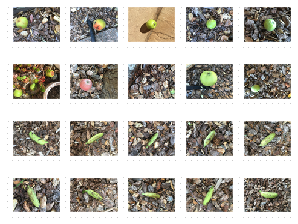

In [5]:
# Show a few images
a_files = original_data_dir + apple_subset.head(n=10)['File']
b_files = original_data_dir + banana_subset.head(n=10)['File']
all_files = np.array(a_files.append(b_files))
a_files = np.array(a_files)
b_files = np.array(b_files)
print('ORIGINAL IMAGES')
show_images(all_files)

CROPPED IMAGES


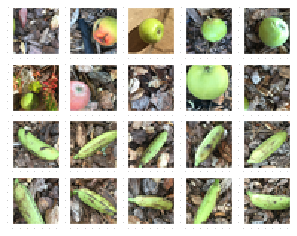

In [6]:
print('CROPPED IMAGES')
show_images(all_files, crop_image)

DIFFERENCE FILTER


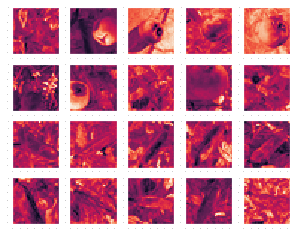

In [7]:
print('DIFFERENCE FILTER')
show_images(all_files, difference_filter)

VALUE FILTER


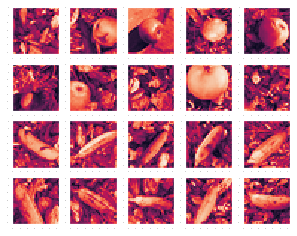

In [8]:
print('VALUE FILTER')
show_images(all_files, value_filter)

FOREGROUND FILTER


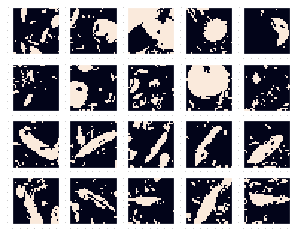

In [9]:
print('FOREGROUND FILTER')
show_images(all_files, foreground_filter)

TRANSPARENT BACKGROUND FILTER


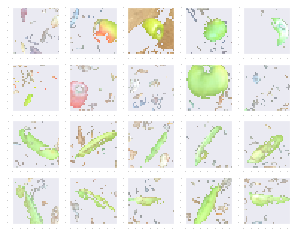

In [10]:
print('TRANSPARENT BACKGROUND FILTER')
show_images(all_files, transparent_background_filter)

## Preprocess and visualize all the data
Create a data array X with all samples (from a_files and b_files) 
in lines and features (redness and elongation) in column. 
Also create a column array with the `truth values`, +1 for Apple and -1 for Banana.

In [11]:
X, Y = preprocess_data(a_files, b_files, extract_features, standardize=True)

In [12]:
# Show the values in X and Y
pretty_print(X, Y, column_names=['redness', 'elongation', 'fruit'])

,redness,elongation,fruit
0,-0.208052,-0.323320,1.0
1,1.731403,0.754402,1.0
2,2.488694,0.206953,1.0
3,-1.274859,1.020749,1.0
4,-1.646389,1.990096,1.0
5,1.345700,-0.284684,1.0
6,1.272731,-0.917129,1.0
7,-0.580097,-1.470282,1.0
8,-0.494389,-1.422601,1.0
9,-0.869877,-1.416058,1.0


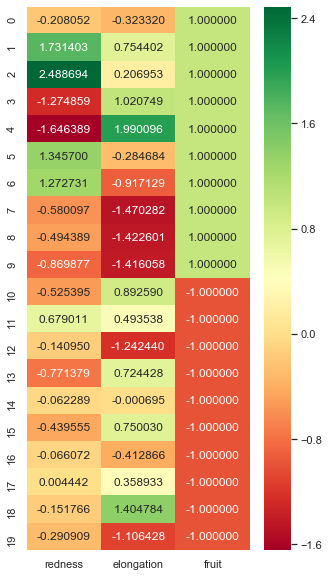

In [13]:
# Show the values as a heat map
heat_map(X, Y, column_names=['redness', 'elongation', 'fruit'])

In [14]:
# Make one training-test split in a stratified manner 
train_index, test_index = split_data(X, Y, verbose = True, seed=0)
Xtrain, Xtest = X[train_index], X[test_index]
Ytrain, Ytest = Y[train_index], Y[test_index]

TRAIN: [14 19  2 11  3 18 12  5  9  1] TEST: [ 0 17  4 13  6  8  7 16 10 15]


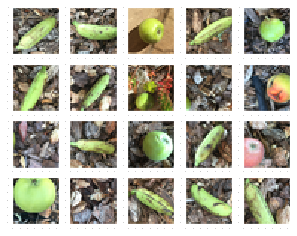

In [15]:
# Show the images in the order of the train/test split:
# Training data first.
all_reordered_files = np.concatenate((all_files[train_index],all_files[test_index]))
show_images(all_reordered_files, crop_image)

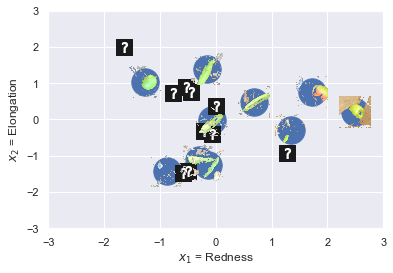

In [16]:
# Plot training and test data as scatter plots
make_scatter_plot(X, all_files, train_index, test_index, filter=transparent_background_filter)

# Step 2: {ME}tric definition
As before we use the error rate and the confution matrix.

# Step 3: {BA}seline results
As before we use the 1-nearest neighbor classifier.

In [17]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(Xtrain, Ytrain.ravel()) 
Ytrain_predicted = neigh.predict(Xtrain)
Ytest_predicted = neigh.predict(Xtest)
e_tr = error_rate(Ytrain.ravel(), Ytrain_predicted)
e_te = error_rate(Ytest.ravel(), Ytest_predicted)
print("NEAREST NEIGHBOR CLASSIFIER")
print("Training error:", e_tr)
print("Test error:", e_te)

NEAREST NEIGHBOR CLASSIFIER
Training error: 0.0
Test error: 0.2


In [18]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(Ytest.ravel(), Ytest_predicted).ravel()
print('Confusion matrix: tn, fp, fn, tp')
print(tn, fp, fn, tp)

Confusion matrix: tn, fp, fn, tp
4 1 1 4


### Here we overlay the predictions on test examples on the scatter plot ...

./code/utilities.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if len(predicted_labels)>0 and not(predicted_labels == "GroundTruth"):


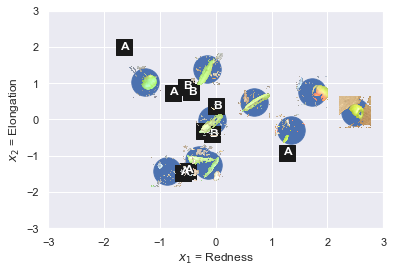

In [19]:
make_scatter_plot(X, all_files, train_index, test_index, 
                  filter=transparent_background_filter, predicted_labels=Ytest_predicted)

### ... then, we show the "ground truth" and compute the error rate

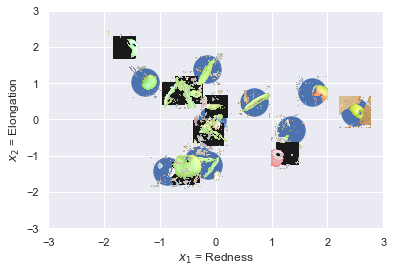

In [20]:
make_scatter_plot(X, all_files, train_index, test_index, 
                  filter=transparent_background_filter, predicted_labels='GroundTruth')

In [21]:
# Print the error rate
e_te = error_rate(Ytest.ravel(), Ytest_predicted)
print("ERROR RATE NEAREST NEIGHBOR CLASSIFIER:", e_te)

ERROR RATE NEAREST NEIGHBOR CLASSIFIER: 0.2


# Step 4: {BAR}s of error and test set size
We repeat multiple times the train/test split and compute the mean and standard deviation of the test error. This allows us to check the variability of our experiments. We wrote a simple wrapper function to train/test on multiple splits.

In [22]:
run_CV(X, Y, neigh.predict, neigh.fit, verbose=True)

TRAIN: [19 14  6  3  8 12  2  5 17 15] TEST: [ 9 13 16  4  7  1 11 18 10  0]
TRAINING ERROR RATE: 0.0
TEST ERROR RATE: 0.1
TRAIN: [10 16  2 11 15  3  1  6 17  0] TEST: [14 13  7 12 18  9  5  4  8 19]
TRAINING ERROR RATE: 0.0
TEST ERROR RATE: 0.3
TRAIN: [ 4 11  5 19 12 15  9 13  8  1] TEST: [ 3 17 14  2  7 18  6 16 10  0]
TRAINING ERROR RATE: 0.0
TEST ERROR RATE: 0.2
TRAIN: [10 13 15  6  5 17  0 16  9  7] TEST: [11  3  8 14 18 19  1 12  2  4]
TRAINING ERROR RATE: 0.0
TEST ERROR RATE: 0.5
TRAIN: [19  6  5 13 14  4  8 11  0 12] TEST: [ 7 17 15 10  3 18 16  2  1  9]
TRAINING ERROR RATE: 0.0
TEST ERROR RATE: 0.3
TRAIN: [ 4  6 12  8  0 10 18  7 13 19] TEST: [ 1 16  3  2 14 15  5 17 11  9]
TRAINING ERROR RATE: 0.0
TEST ERROR RATE: 0.5
TRAIN: [10 18 12  6  7 13  8  4 14  9] TEST: [17  0 11 19  5 15  1 16  3  2]
TRAINING ERROR RATE: 0.0
TEST ERROR RATE: 0.2
TRAIN: [ 3 10  7 15  2 16  8 18  6 13] TEST: [ 9  5 19 11 14 17 12  1  4  0]
TRAINING ERROR RATE: 0.0
TEST ERROR RATE: 0.3
TRAIN: [ 3  7  8

## Compare with the performance of our own classifier
From last time, you create a simple hand-crafted classifier, which was renamed `simple_linear_predict`. Note that this classifier does NOT have a training method!!

In [23]:
??simple_linear_predict

In [24]:
Ytrain_predicted = simple_linear_predict(Xtrain)
Ytest_predicted = simple_linear_predict(Xtest)
e_tr = error_rate(Ytrain, Ytrain_predicted)
e_te = error_rate(Ytest, Ytest_predicted)
print("SIMPLE LINEAR CLASSIFIER")
print("Training error:", e_tr)
print("Test error:", e_te)

SIMPLE LINEAR CLASSIFIER
Training error: 0.4
Test error: 0.2


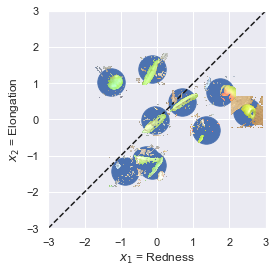

In [25]:
make_scatter_plot(X, all_files, train_index, [], 
                  filter=transparent_background_filter, predicted_labels='GroundTruth',
                 show_diag=True, axis='square')

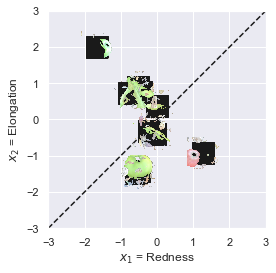

In [26]:
make_scatter_plot(X, all_files, [], test_index, 
                  filter=transparent_background_filter, predicted_labels='GroundTruth',
                 show_diag=True, axis='square')

In [27]:
run_CV(X, Y, simple_linear_predict, verbose=True)

TRAIN: [19 14  6  3  8 12  2  5 17 15] TEST: [ 9 13 16  4  7  1 11 18 10  0]
TRAINING ERROR RATE: 0.3
TEST ERROR RATE: 0.3
TRAIN: [10 16  2 11 15  3  1  6 17  0] TEST: [14 13  7 12 18  9  5  4  8 19]
TRAINING ERROR RATE: 0.3
TEST ERROR RATE: 0.3
TRAIN: [ 4 11  5 19 12 15  9 13  8  1] TEST: [ 3 17 14  2  7 18  6 16 10  0]
TRAINING ERROR RATE: 0.4
TEST ERROR RATE: 0.2
TRAIN: [10 13 15  6  5 17  0 16  9  7] TEST: [11  3  8 14 18 19  1 12  2  4]
TRAINING ERROR RATE: 0.1
TEST ERROR RATE: 0.5
TRAIN: [19  6  5 13 14  4  8 11  0 12] TEST: [ 7 17 15 10  3 18 16  2  1  9]
TRAINING ERROR RATE: 0.4
TEST ERROR RATE: 0.2
TRAIN: [ 4  6 12  8  0 10 18  7 13 19] TEST: [ 1 16  3  2 14 15  5 17 11  9]
TRAINING ERROR RATE: 0.3
TEST ERROR RATE: 0.3
TRAIN: [10 18 12  6  7 13  8  4 14  9] TEST: [17  0 11 19  5 15  1 16  3  2]
TRAINING ERROR RATE: 0.2
TEST ERROR RATE: 0.4
TRAIN: [ 3 10  7 15  2 16  8 18  6 13] TEST: [ 9  5 19 11 14 17 12  1  4  0]
TRAINING ERROR RATE: 0.2
TEST ERROR RATE: 0.4
TRAIN: [ 3  7  8

# Process the entire dataset
Note: we do not standardize the data, this will be left up to the user.

In [28]:
a_files = original_data_dir + apple_subset['File']
b_files = original_data_dir + banana_subset['File']
all_files = np.array(a_files.append(b_files))
a_files = np.array(a_files)
b_files = np.array(b_files)
X, Y = preprocess_data(a_files, b_files, extract_features)
print(X.shape, Y.shape)

(491, 2) (491, 1)


In [29]:
file_name = os.path.join(data_dir, 'RE_data.csv') # Redness Elongation (RE) features
data_to_csv(X, Y, ['redness', 'elongation', 'fruit'], file_name)

,redness,elongation,fruit
0,8.429612,1.403201,1.0
1,42.896078,1.703201,1.0
2,56.354067,1.550811,1.0
3,-10.528846,1.777343,1.0
4,-17.131387,2.047174,1.0
5,36.041667,1.413956,1.0
6,34.744932,1.237906,1.0
7,1.817919,1.083928,1.0
8,3.341065,1.097200,1.0
9,-3.331818,1.099021,1.0


In [30]:
run_CV(X, Y, neigh.predict, neigh.fit)

TRAINING ERROR RATE: 0.00 +- 0.00
TEST ERROR RATE: 0.32 +- 0.03


In [31]:
run_CV(X, Y, simple_linear_predict)

TRAINING ERROR RATE: 0.49 +- 0.03
TEST ERROR RATE: 0.50 +- 0.03


# Dataset with more features
Now we redo the preprocessing, but add more features.

In [32]:
X, Y = preprocess_data(a_files, b_files, extract_more_features)
print(X.shape, Y.shape)

(491, 21) (491, 1)


In [33]:
file_name = os.path.join(data_dir, 'CS_data.csv') # Color Shape (CS) features
header = ['R','G','B','M=maxRGB', 'm=minRGB', 'C=M-m', 'R-(G+B)/2', 'G-B', 'G-(R+B)/2', 'B-R', 'B-(G+R)/2', 'R-G', '(G-B)/C', '(B-R)/C', '(R-G)/C', '(R+G+B)/3', 'C/V', 'W', 'H', 'W/H', 'W*H', 'fruit']
data_to_csv(X, Y, header, file_name)

,R,G,B,M=maxRGB,m=minRGB,C=M-m,R-(G+B)/2,G-B,G-(R+B)/2,B-R,...,(G-B)/C,(B-R)/C,(R-G)/C,(R+G+B)/3,C/V,W,H,W/H,W*H,fruit
0,200.631068,193.495146,190.907767,205.354369,183.635922,21.718447,8.429612,2.587379,-2.274272,-9.723301,...,0.119133,-0.447698,0.328565,195.011327,0.111370,159.085788,113.373463,1.403201,18036.106721,1.0
1,212.400000,194.105882,144.901961,222.776471,137.756863,85.019608,42.896078,49.203922,15.454902,-67.498039,...,0.578736,-0.793911,0.215175,183.802614,0.462559,160.603213,94.294927,1.703201,15144.068336,1.0
2,203.693780,181.503987,113.175439,207.778309,113.175439,94.602871,56.354067,68.328549,23.069378,-90.518341,...,0.722267,-0.956824,0.234557,166.124402,0.569470,264.187824,170.354671,1.550811,45005.629862,1.0
3,168.534615,211.653846,146.473077,214.396154,142.392308,72.003846,-10.528846,65.180769,54.150000,-22.061538,...,0.905240,-0.306394,-0.598846,175.553846,0.410152,138.587386,77.974490,1.777343,10806.280695,1.0
4,201.299270,237.810219,199.051095,238.284672,193.218978,45.065693,-17.131387,38.759124,37.635036,-2.248175,...,0.860058,-0.049887,-0.810172,212.720195,0.211854,86.819317,42.409340,2.047174,3681.949959,1.0
5,203.861111,197.046296,138.592593,214.592593,138.453704,76.138889,36.041667,58.453704,25.819444,-65.268519,...,0.767725,-0.857230,0.089505,179.833333,0.423386,87.088356,61.591980,1.413956,5363.944244,1.0
6,218.391892,184.202703,183.091216,219.422297,179.266892,40.155405,34.744932,1.111486,-16.538851,-35.300676,...,0.027680,-0.879101,0.851422,195.228604,0.205684,156.707144,126.590527,1.237906,19837.639971,1.0
7,198.034682,197.080925,195.352601,207.219653,186.491329,20.728324,1.817919,1.728324,0.387283,-2.682081,...,0.083380,-0.129392,0.046012,196.822736,0.105315,105.557288,97.384080,1.083928,10279.599332,1.0
8,188.207904,227.116838,142.616838,228.565292,142.142612,86.422680,3.341065,84.500000,61.704467,-45.591065,...,0.977753,-0.527536,-0.450217,185.980527,0.464687,187.481967,170.873092,1.097200,32035.623316,1.0
9,179.690909,185.754545,180.290909,192.818182,169.790909,23.027273,-3.331818,5.463636,5.763636,0.600000,...,0.237268,0.026056,-0.263324,181.912121,0.126585,101.000991,91.900835,1.099021,9282.075394,1.0


In [34]:
run_CV(X, Y, neigh.predict, neigh.fit)

TRAINING ERROR RATE: 0.00 +- 0.00
TEST ERROR RATE: 0.40 +- 0.03


# Dataset from raw images
We also create a dataset with just the pixel values.

## First the full images

In [35]:
X, Y = preprocess_data(a_files, b_files, extract_raw_image)
print(X.shape, Y.shape)

(491, 14580) (491, 1)


In [36]:
file_name = os.path.join(data_dir, 'RAW_data.csv') # Raw data (pixels)
data_to_csv(X, Y, file_name=file_name)

,0,1,2,3,4,5,6,7,8,9,...,14571,14572,14573,14574,14575,14576,14577,14578,14579,14580
0,163.0,178.0,202.0,161.0,178.0,204.0,157.0,173.0,200.0,163.0,...,61.0,65.0,69.0,157.0,178.0,169.0,202.0,238.0,231.0,1.0
1,145.0,139.0,134.0,85.0,77.0,75.0,171.0,170.0,177.0,195.0,...,152.0,154.0,165.0,131.0,132.0,142.0,129.0,140.0,150.0,1.0
2,217.0,189.0,144.0,224.0,196.0,151.0,218.0,190.0,145.0,217.0,...,202.0,162.0,114.0,192.0,151.0,104.0,159.0,122.0,84.0,1.0
3,75.0,80.0,93.0,38.0,39.0,45.0,82.0,86.0,101.0,89.0,...,62.0,61.0,60.0,67.0,66.0,65.0,67.0,64.0,61.0,1.0
4,200.0,194.0,193.0,178.0,173.0,176.0,146.0,143.0,151.0,146.0,...,159.0,178.0,188.0,214.0,235.0,243.0,204.0,227.0,242.0,1.0
5,119.0,68.0,40.0,128.0,71.0,44.0,80.0,44.0,27.0,21.0,...,80.0,68.0,52.0,73.0,59.0,44.0,94.0,82.0,69.0,1.0
6,240.0,234.0,223.0,212.0,224.0,228.0,129.0,141.0,149.0,104.0,...,111.0,104.0,83.0,126.0,116.0,90.0,127.0,117.0,91.0,1.0
7,106.0,119.0,130.0,194.0,217.0,224.0,174.0,197.0,208.0,159.0,...,153.0,145.0,132.0,198.0,182.0,158.0,216.0,211.0,191.0,1.0
8,177.0,162.0,131.0,213.0,202.0,170.0,223.0,210.0,178.0,207.0,...,127.0,123.0,116.0,195.0,181.0,155.0,162.0,140.0,104.0,1.0
9,92.0,86.0,73.0,57.0,54.0,48.0,59.0,59.0,53.0,61.0,...,205.0,207.0,189.0,200.0,196.0,168.0,182.0,174.0,136.0,1.0


In [37]:
run_CV(X, Y, neigh.predict, neigh.fit)

TRAINING ERROR RATE: 0.00 +- 0.00
TEST ERROR RATE: 0.38 +- 0.03


## Then cropped images

In [38]:
X, Y = preprocess_data(a_files, b_files, extract_cropped_image)
print(X.shape, Y.shape)

(491, 3072) (491, 1)


In [39]:
file_name = os.path.join(data_dir, 'CROP_data.csv') # Cropped data (pixels)
data_to_csv(X, Y, file_name=file_name)

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,3072
0,103.0,101.0,88.0,48.0,44.0,38.0,148.0,135.0,128.0,146.0,...,115.0,113.0,121.0,120.0,120.0,131.0,151.0,151.0,162.0,1.0
1,149.0,131.0,121.0,121.0,103.0,88.0,130.0,127.0,123.0,178.0,...,126.0,143.0,160.0,179.0,185.0,187.0,142.0,148.0,147.0,1.0
2,216.0,184.0,140.0,217.0,186.0,142.0,217.0,186.0,141.0,217.0,...,208.0,165.0,112.0,196.0,157.0,108.0,175.0,138.0,94.0,1.0
3,116.0,129.0,150.0,120.0,128.0,142.0,136.0,143.0,146.0,123.0,...,88.0,77.0,66.0,61.0,52.0,47.0,24.0,19.0,17.0,1.0
4,195.0,176.0,143.0,183.0,169.0,132.0,70.0,67.0,61.0,52.0,...,55.0,51.0,37.0,62.0,67.0,62.0,107.0,120.0,127.0,1.0
5,78.0,49.0,26.0,76.0,48.0,26.0,95.0,62.0,35.0,110.0,...,112.0,134.0,36.0,154.0,130.0,64.0,171.0,142.0,115.0,1.0
6,182.0,182.0,184.0,176.0,183.0,190.0,43.0,45.0,45.0,5.0,...,84.0,69.0,50.0,86.0,85.0,77.0,93.0,95.0,90.0,1.0
7,78.0,72.0,71.0,92.0,79.0,75.0,66.0,48.0,43.0,79.0,...,127.0,115.0,103.0,99.0,92.0,87.0,177.0,156.0,144.0,1.0
8,73.0,67.0,57.0,89.0,84.0,75.0,73.0,73.0,67.0,85.0,...,94.0,91.0,84.0,17.0,14.0,8.0,74.0,73.0,71.0,1.0
9,68.0,57.0,48.0,64.0,47.0,35.0,109.0,93.0,76.0,74.0,...,173.0,154.0,129.0,154.0,121.0,91.0,130.0,101.0,69.0,1.0


In [40]:
run_CV(X, Y, neigh.predict, neigh.fit)

TRAINING ERROR RATE: 0.00 +- 0.00
TEST ERROR RATE: 0.17 +- 0.02


# Create a picture with all images and their number

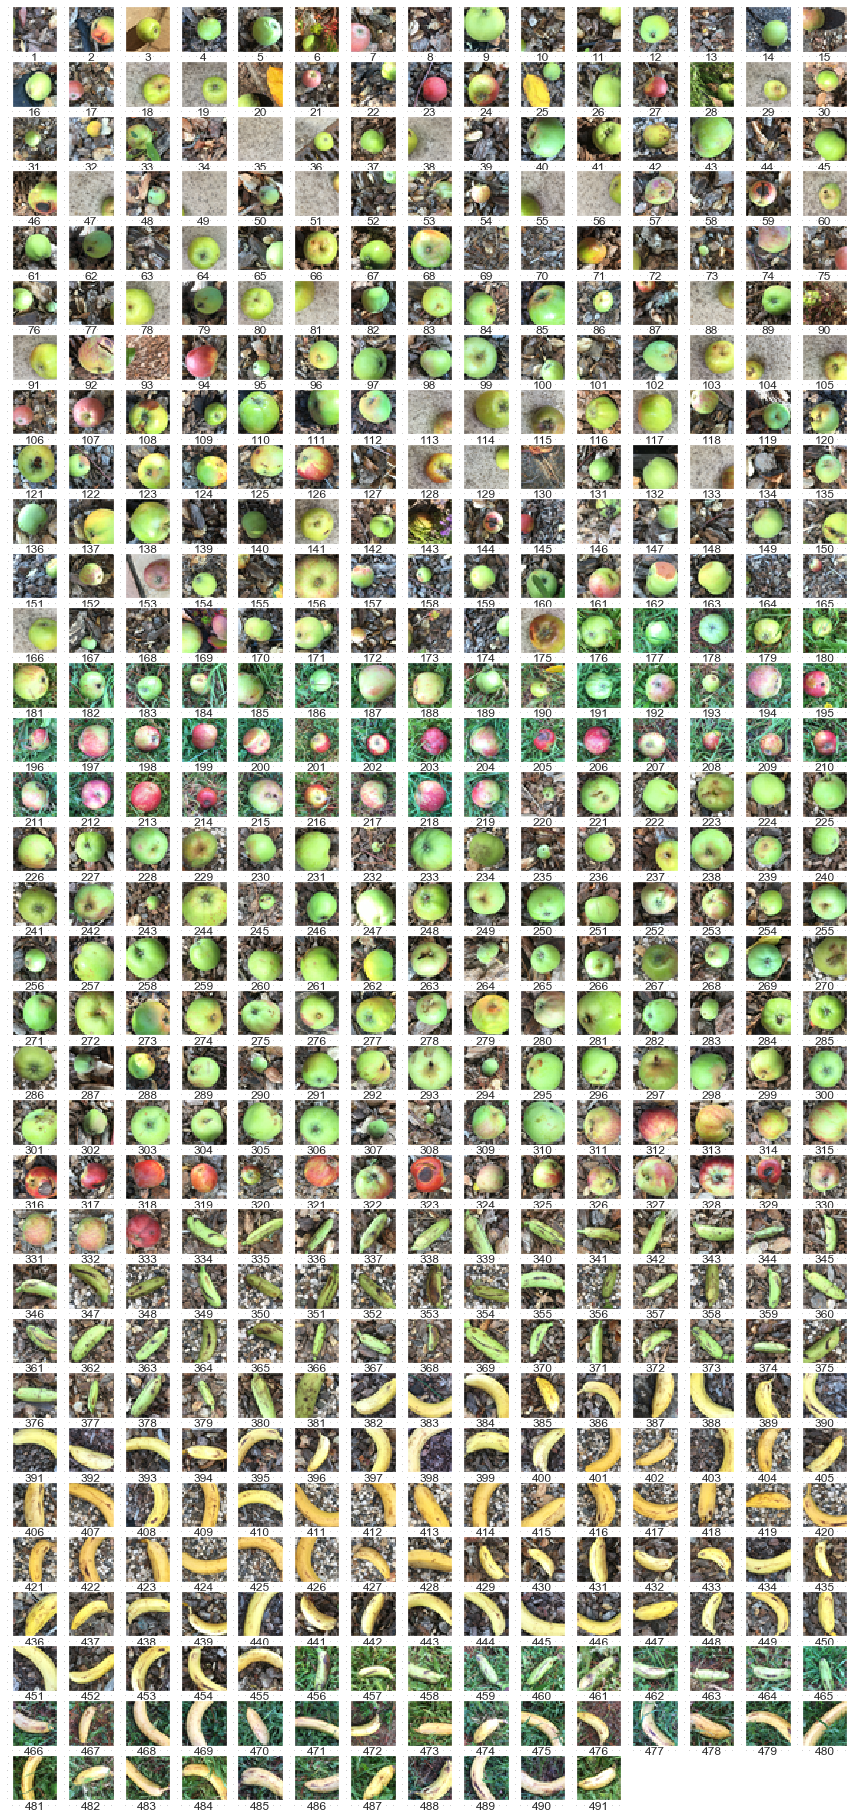

In [57]:
a_files = original_data_dir + apple_subset['File']
b_files = original_data_dir + banana_subset['File']
all_files = np.array(a_files.append(b_files))
show_images(all_files, crop_image, columns = 15, show_num=True)